In [332]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [333]:
# Step 1: Load the data
bank_data_path = r'c:\Users\user\OneDrive\桌面\bank.csv'
bank_data = pd.read_csv(bank_data_path, sep=',')

# Step 2: Encode the target variable (loan)
bank_data['loan'] = bank_data['loan'].map({'yes': 1, 'no': 0})

# Step 3: Select features (X) and target variable (y)
X = bank_data.drop(columns=['loan', 'deposit','month'])  # Exclude target variables
y = bank_data['loan']


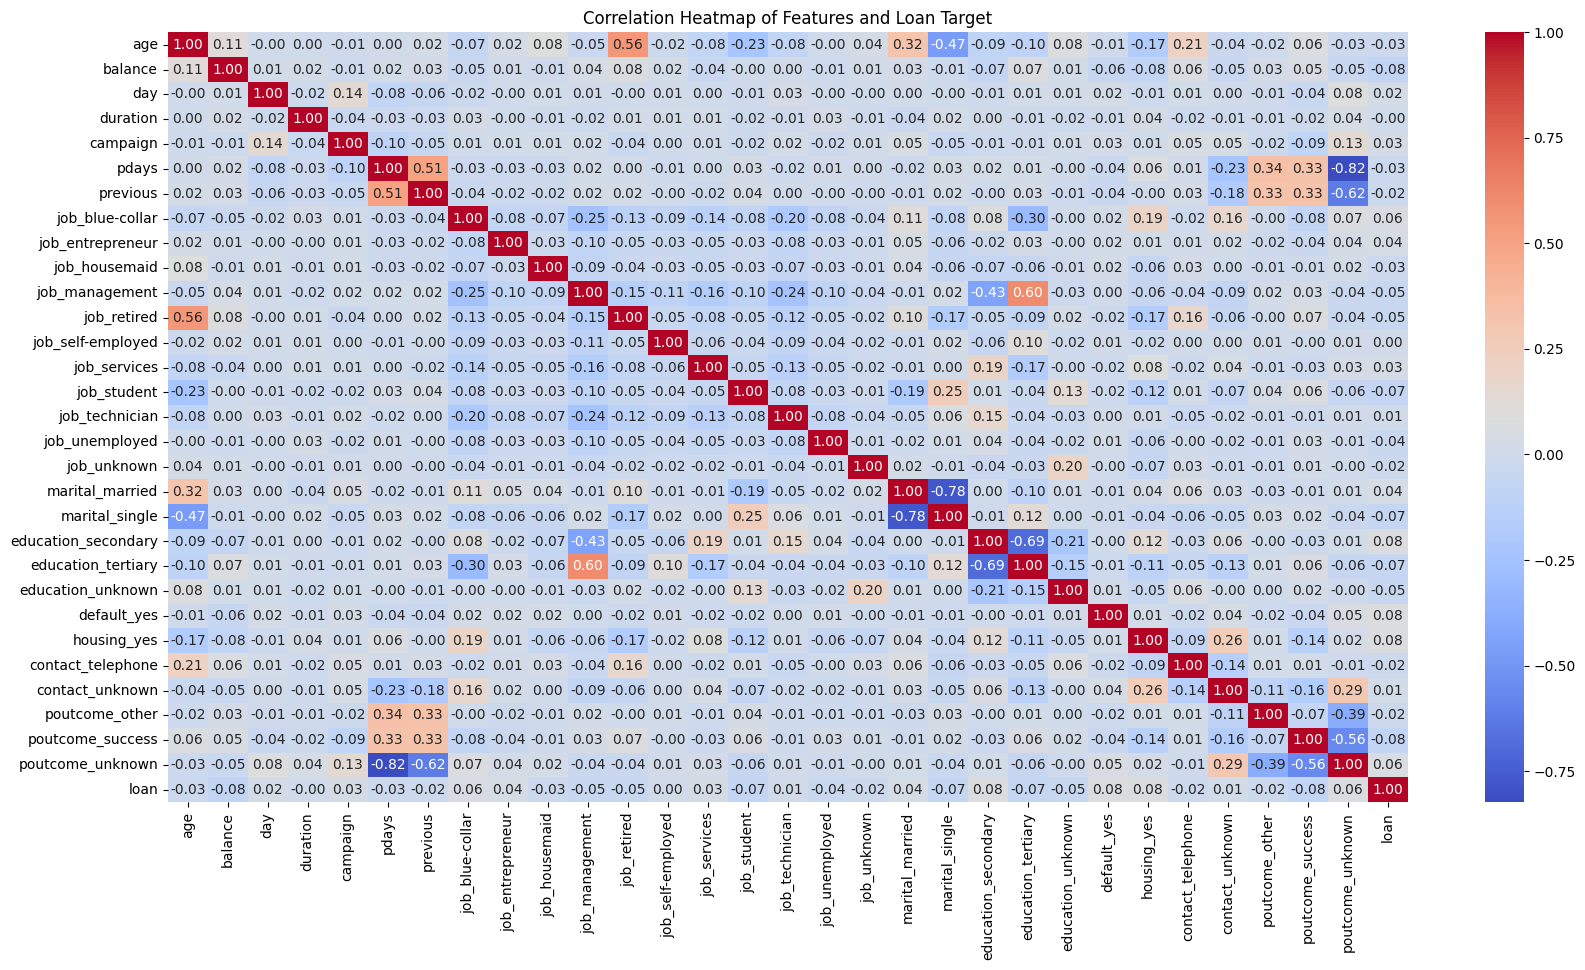

In [334]:
# Step 4: One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Step 5: Combine features and target for correlation analysis
bank_combined = pd.concat([X, y], axis=1)

# Step 6: Plot the correlation heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(bank_combined.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Features and Loan Target")
plt.show()

# Step 7: Scale the features for Logistic Regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

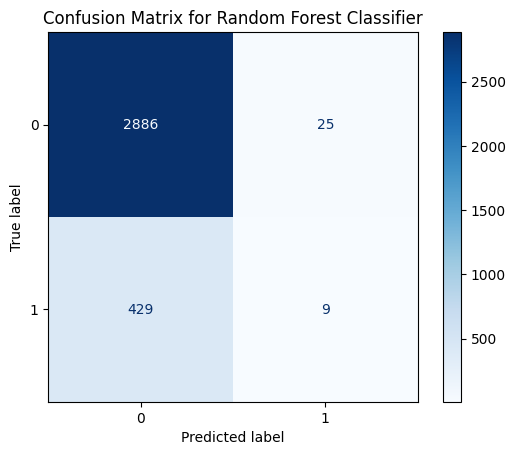

In [335]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 8: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Step 9: Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 10: Make predictions and calculate confusion matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# Optional: Display the confusion matrix as a chart
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')  # Customize the colormap and format
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

In [336]:
# Step 12: Analyze feature importance for Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Optional: Display the feature importance
print("Feature Importance:")
print(feature_importance)


Feature Importance:
                Feature  Importance
1               balance    0.196030
3              duration    0.176708
0                   age    0.142080
2                   day    0.129160
4              campaign    0.074300
5                 pdays    0.032646
24          housing_yes    0.023133
6              previous    0.021486
26      contact_unknown    0.019678
18      marital_married    0.017529
7       job_blue-collar    0.016200
15       job_technician    0.016030
20  education_secondary    0.015057
13         job_services    0.012363
10       job_management    0.012075
19       marital_single    0.011870
21   education_tertiary    0.010631
25    contact_telephone    0.010142
23          default_yes    0.009648
12    job_self-employed    0.008797
8      job_entrepreneur    0.007775
29     poutcome_unknown    0.005312
11          job_retired    0.005258
16       job_unemployed    0.005056
28     poutcome_success    0.004885
27       poutcome_other    0.004407
22    ed

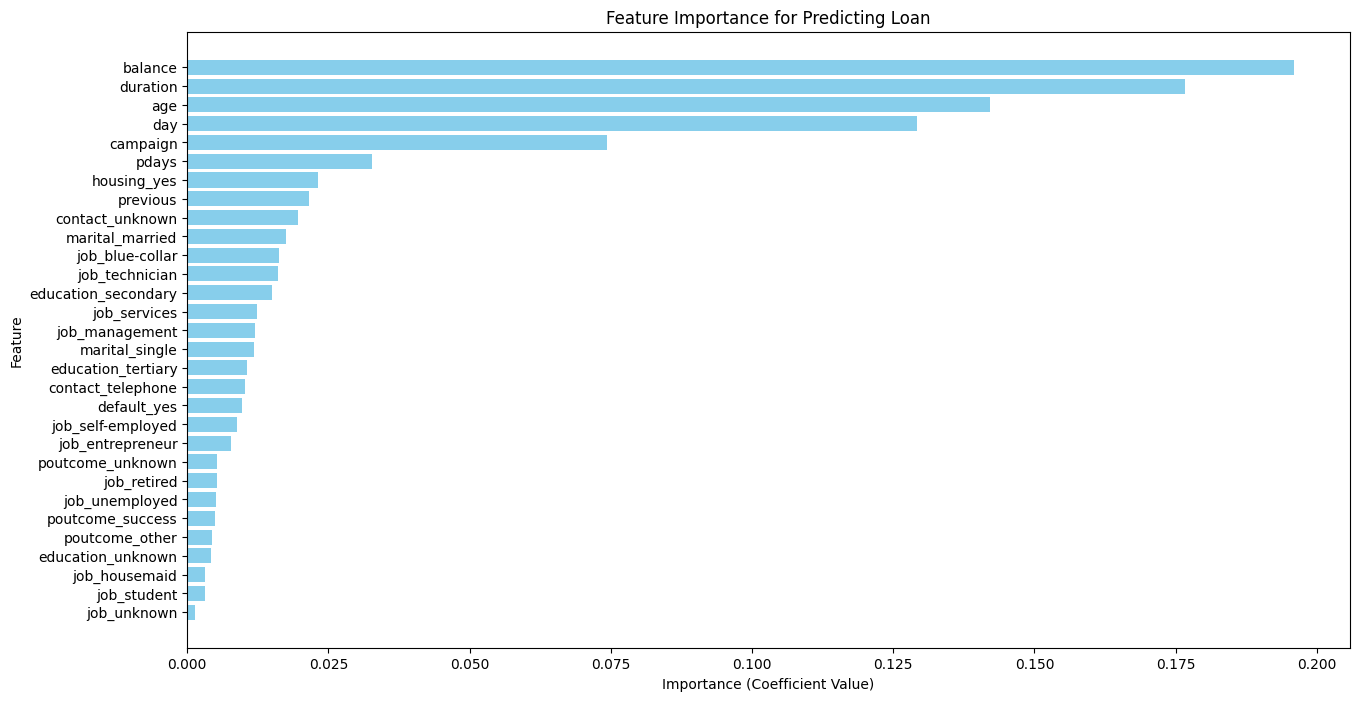

Top factors predicting loan status:
            Feature  Importance
1           balance    0.196030
3          duration    0.176708
0               age    0.142080
2               day    0.129160
4          campaign    0.074300
5             pdays    0.032646
24      housing_yes    0.023133
6          previous    0.021486
26  contact_unknown    0.019678
18  marital_married    0.017529


In [337]:
# Step 13: Plot feature importance
plt.figure(figsize=(15, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.xlabel("Importance (Coefficient Value)")
plt.ylabel("Feature")
plt.title("Feature Importance for Predicting Loan")
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
plt.show()

# Print top features
print("Top factors predicting loan status:")
print(feature_importance.head(10))

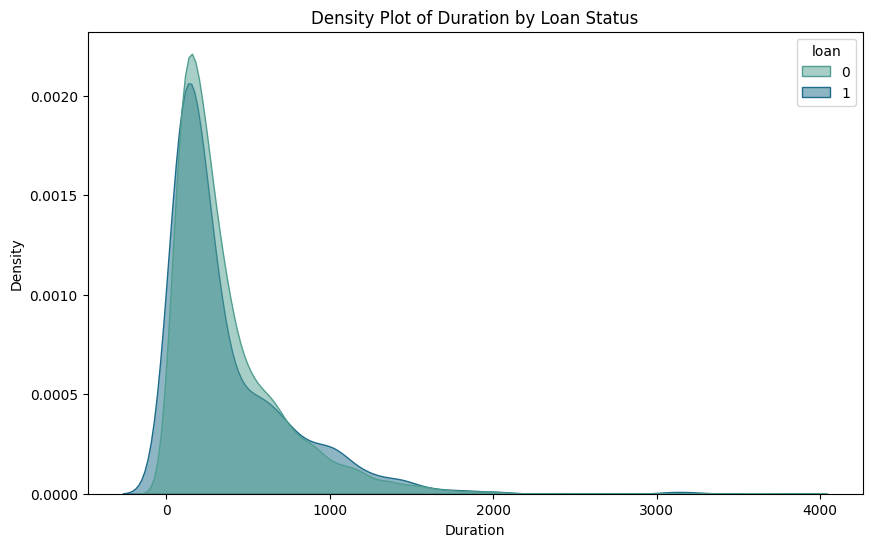

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, deposit]
Index: []


In [338]:
# Step 14: KDE Plot for 'duration'
plt.figure(figsize=(10, 6))
sns.kdeplot(data=bank_data, x='duration', hue='loan', fill=True, common_norm=False, palette="crest", alpha=0.5)
plt.title("Density Plot of Duration by Loan Status")
plt.xlabel("Duration")
plt.ylabel("Density")
plt.show()
# 假設你的數據儲存在 data 中
negative_duration = bank_data[bank_data['duration'] < 0]
print(negative_duration)

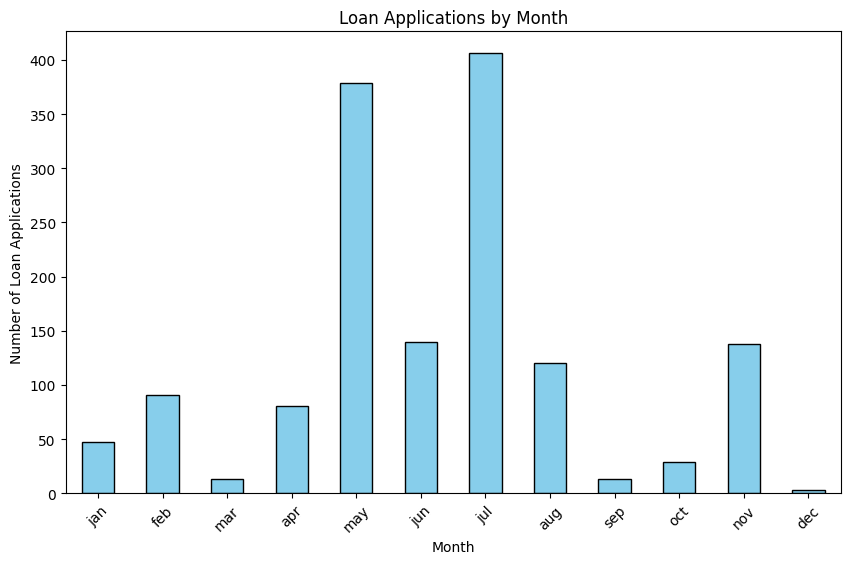

In [339]:
# Step 15: Time Series Analysis (Monthly Loan Applications)
if 'month' in bank_data.columns:
    loan_by_month = bank_data.groupby('month')['loan'].sum().reindex([
        'jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'
    ], fill_value=0)  # Ensure correct order

    plt.figure(figsize=(10, 6))
    loan_by_month.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Loan Applications by Month")
    plt.xlabel("Month")
    plt.ylabel("Number of Loan Applications")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("The dataset does not contain a 'month' column for time series analysis.")


每月的 duration 和 balance 平均值與中位數：
         duration             balance        
             mean median         mean  median
month                                        
apr    398.721560  307.0  1734.264355   722.0
aug    352.072416  232.0  1580.872943   490.0
dec    397.054545  329.5  2735.209091   967.5
feb    343.125000  229.0  1568.166237   619.0
jan    349.482558  233.0  1151.093023   497.5
jul    418.867239  283.5  1061.122193   306.5
jun    364.742226  244.0  1601.206219   693.0
mar    291.369565  229.0  2118.605072   878.5
may    378.363669  257.0  1192.357649   383.5
nov    363.215270  234.0  2349.909862  1101.0
oct    346.801020  257.0  2037.581633   988.5
sep    350.968652  271.0  1930.614420  1000.0


C:\Users\user\AppData\Local\Temp\ipykernel_1824\594784007.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_data, x='month', y='duration', palette='Blues')
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35441 (\N{CJK UNIFIED IDEOGRAPH-8A71}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

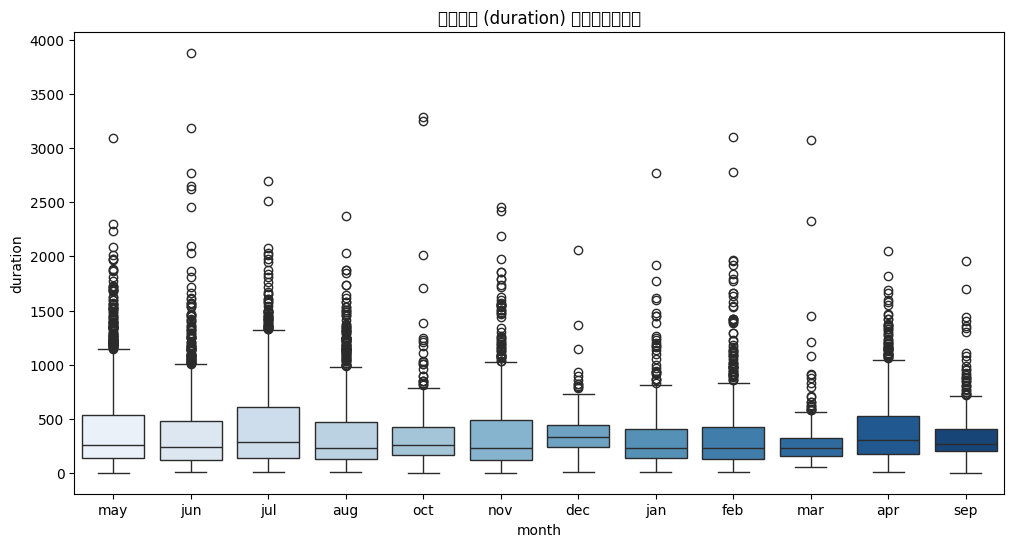

C:\Users\user\AppData\Local\Temp\ipykernel_1824\594784007.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=bank_data, x='month', y='balance', palette='Greens')
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36076 (\N{CJK UNIFIED IDEOGRAPH-8CEC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25142 (\N{CJK UNIFIED IDEOGRAPH-6236}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\user\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39192 (\N{CJK UNIFIED IDEOGRAPH-9918}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)

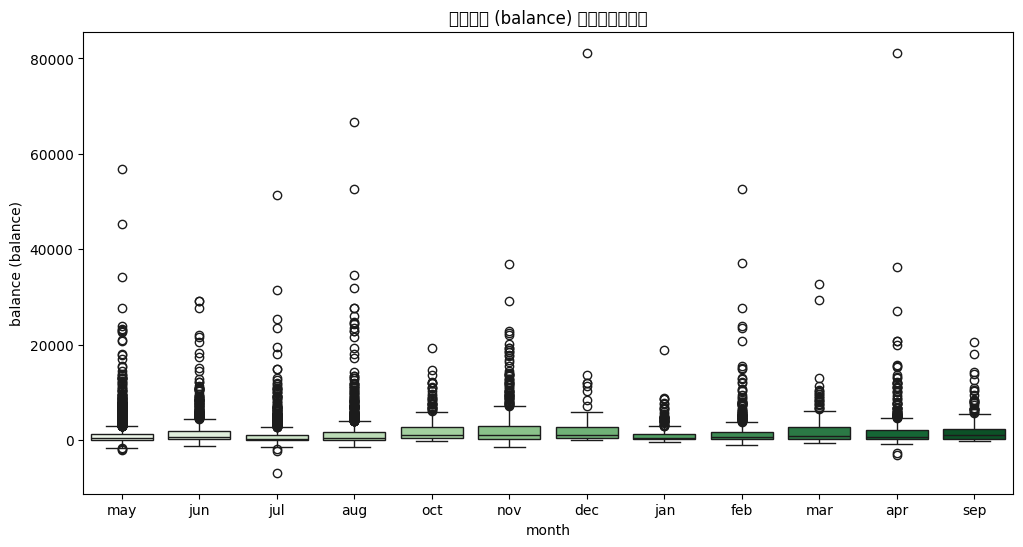

通話時間 (duration) 的 ANOVA 檢定結果： F_onewayResult(statistic=np.float64(6.000221303209691), pvalue=np.float64(7.505698958785795e-10))
賬戶餘額 (balance) 的 ANOVA 檢定結果： F_onewayResult(statistic=np.float64(15.92022963434258), pvalue=np.float64(1.9180237969048317e-31))
通話時間 (duration) 的 Kruskal-Wallis 檢定結果： KruskalResult(statistic=np.float64(93.98500091176184), pvalue=np.float64(2.7502700708311715e-15))
賬戶餘額 (balance) 的 Kruskal-Wallis 檢定結果： KruskalResult(statistic=np.float64(463.7890016515571), pvalue=np.float64(1.670787426713358e-92))


In [340]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal

# 確保日期字段被正確處理，並提取月份
if 'month' not in bank_data.columns:
    print("確保資料中有 'month' 欄位，如果沒有請檢查數據或提取月份")
else:
    # Step 1: 按月份分組，計算 duration 和 balance 的平均值和中位數
    month_analysis = bank_data.groupby('month')[['duration', 'balance']].agg(['mean', 'median'])

    # Step 2: 打印摘要
    print("每月的 duration 和 balance 平均值與中位數：")
    print(month_analysis)

    # Step 3: 使用箱型圖可視化 duration 和 balance 在不同月份的分布
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=bank_data, x='month', y='duration', palette='Blues')
    plt.title("通話時間 (duration) 在各月份的分布")
    plt.xlabel("month")
    plt.ylabel("duration")
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=bank_data, x='month', y='balance', palette='Greens')
    plt.title("賬戶餘額 (balance) 在各月份的分布")
    plt.xlabel("month")
    plt.ylabel("balance (balance)")
    plt.show()

    # Step 4: 檢查是否存在顯著差異（使用 ANOVA 或 Kruskal-Wallis 檢定）
    # 提取每個月的數據
    durations_by_month = [bank_data[bank_data['month'] == m]['duration'] for m in bank_data['month'].unique()]
    balances_by_month = [bank_data[bank_data['month'] == m]['balance'] for m in bank_data['month'].unique()]

    # ANOVA 檢定（適用於正態分布）
    anova_duration = f_oneway(*durations_by_month)
    anova_balance = f_oneway(*balances_by_month)
    print("通話時間 (duration) 的 ANOVA 檢定結果：", anova_duration)
    print("賬戶餘額 (balance) 的 ANOVA 檢定結果：", anova_balance)

    # Kruskal-Wallis 檢定（非參數方法）
    kruskal_duration = kruskal(*durations_by_month)
    kruskal_balance = kruskal(*balances_by_month)
    print("通話時間 (duration) 的 Kruskal-Wallis 檢定結果：", kruskal_duration)
    print("賬戶餘額 (balance) 的 Kruskal-Wallis 檢定結果：", kruskal_balance)


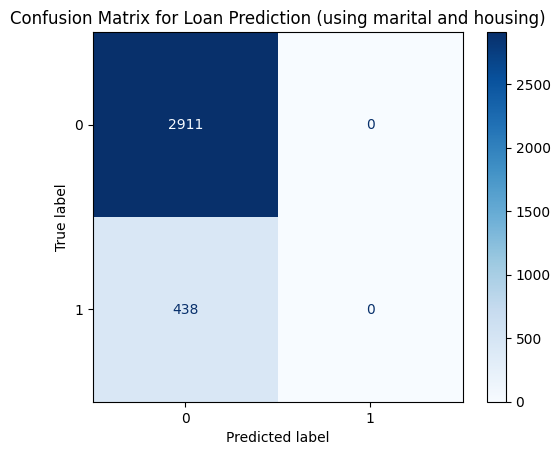

準確度: 0.8692146909525231


In [341]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import OneHotEncoder


# 編碼 'marital' 特徵
encoder = OneHotEncoder(drop='first', sparse_output=False)
marital_encoded = encoder.fit_transform(bank_data[['marital']])
marital_encoded_df = pd.DataFrame(marital_encoded, columns=encoder.get_feature_names_out(['marital']))

# 編碼 'housing' 特徵
bank_data['housing_encoded'] = bank_data['housing'].map({'yes': 1, 'no': 0})

# 合併特徵
X = pd.concat([marital_encoded_df, bank_data['housing_encoded']], axis=1)
y = bank_data['loan']

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 訓練邏輯回歸模型
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 預測並生成混淆矩陣
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

# 顯示混淆矩陣
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Loan Prediction (using marital and housing)")
plt.show()

# 計算準確度
accuracy = accuracy_score(y_test, y_pred)
print("準確度:", accuracy)
